In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Dataset = pd.read_csv("boston_2019.csv")
df = pd.DataFrame(Dataset['start_time'])
times = pd.to_datetime(df.start_time)
df['start_time'] = times.dt.floor('h')

df_test = pd.DataFrame(df['start_time'].unique())
df_test.columns = ['unique_hour']
daterange = pd.date_range(df_test['unique_hour'].iloc[0], df_test['unique_hour'].iloc[8699], freq='h')

df_all_dates = pd.DataFrame(daterange)
df_all_dates.columns = ['unique_hour']
df_difference = pd.concat([df_test, df_all_dates]).drop_duplicates(keep=False)

unique_hour_agg = pd.DataFrame(df_difference['unique_hour'].groupby(df_difference['unique_hour'].dt.date).count())
unique_hour_agg.reset_index(drop=True, inplace=False)
unique_hour_agg.columns = ['count']
unique_hour_agg.to_csv('Missing_hours.csv')

<BarContainer object of 28 artists>

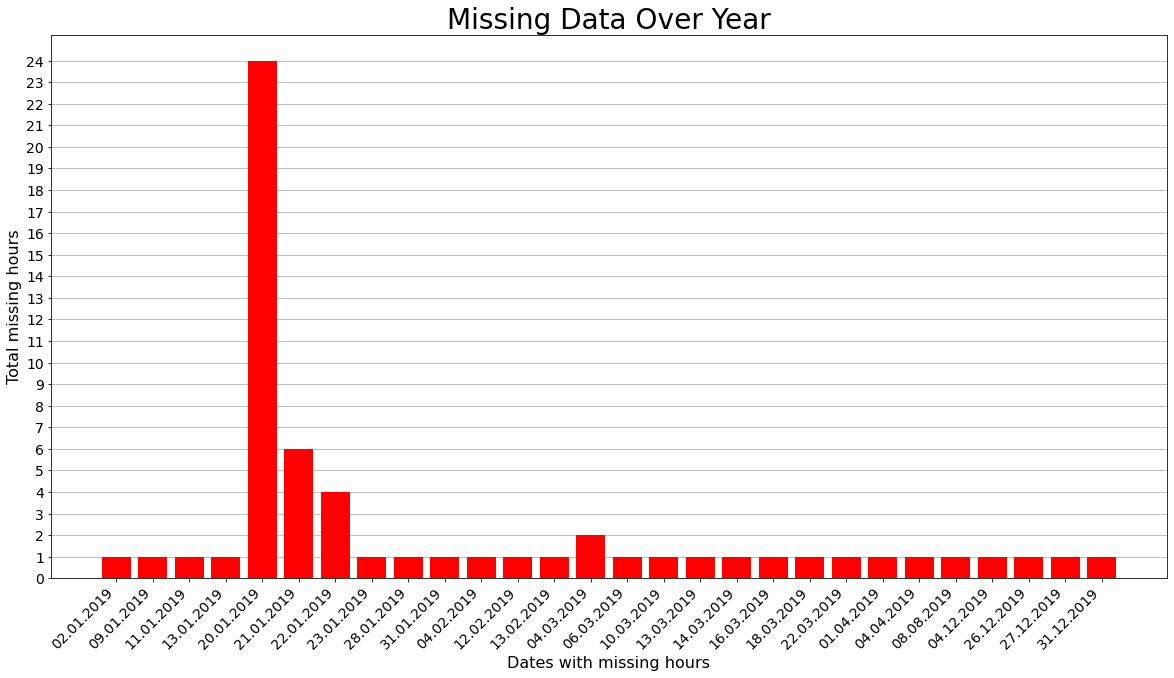

In [50]:
unique_hour_agg.index = pd.to_datetime(unique_hour_agg.index).strftime('%d.%m.%Y')
fig = plt.figure(figsize=(20, 10))
subplotMissingData = fig.add_subplot(1,1,1)
subplotMissingData.grid(axis = 'y', zorder=0)
subplotMissingData.set_title('Missing Data Over Year', fontsize=28)
subplotMissingData.set_ylabel('Total missing hours', fontsize=16)
subplotMissingData.set_xlabel('Dates with missing hours', rotation = 0, fontsize=16)
subplotMissingData.set_xticks(np.arange(0, len(unique_hour_agg)))
subplotMissingData.set_xticklabels(unique_hour_agg.index, rotation = 45, ha='right', fontsize=14)
subplotMissingData.set_yticks(np.arange(0,25))
subplotMissingData.set_yticklabels(np.arange(0,25), fontsize=14)
subplotMissingData.bar(np.arange(0, len(unique_hour_agg)), unique_hour_agg['count'], color='red', zorder=3)

In [52]:
# Save the picture as PNG and PDF file
fig.savefig('Missing_Hours.pdf', dpi=300)
fig.savefig('Missing_Hours.png', dpi=300)